In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Create reference to CSV file
runners_data = "Resources/2019boston_marathon_runners.csv"
runners_data_df = pd.read_csv(runners_data)
runners_data_df.head()

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:07:57,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,2:07:59,2,2,2,Runners,NaN,NaN
2,7,Kenneth Kipkemoi,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:07,3,3,3,Runners,NaN,NaN
3,8,Felix Kandie,"Kandie, Felix",32,M,Iten,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:54,4,4,4,Runners,NaN,NaN
4,11,Geoffrey Kirui,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:55,5,5,5,Runners,NaN,NaN


In [3]:
# Look over all dirty data
runners_data_df.count()

BibNumber             26656
FullName              26656
SortName              26656
AgeOnRaceDay          26656
Gender                26656
City                  26655
StateAbbrev           21604
StateName             21603
Zip                   26580
CountryOfResAbbrev    26656
CountryOfResName      26656
CountryOfCtzAbbrev    26656
CountryOfCtzName      26656
OfficialTime          26656
RankOverall           26656
RankOverGender        26656
RankOverDivision      26656
EventGroup            26656
SubGroupLabel           114
SubGroup                113
dtype: int64

In [4]:
# Look deeper within the DataFrame and Remove SubGrouped Runners
runnersgroups = runners_data_df.groupby("SubGroupLabel")
runnersgroups["SubGroupLabel"].count()

SubGroupLabel
DUO         9
MI         55
Runners     1
VI         49
Name: SubGroupLabel, dtype: int64

In [5]:
# Remove useless gender that misguided data along with
runnersgroups_df = runners_data_df.loc[runners_data_df["Gender"] == "62"]
runnersgroups_df

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
26368,28913,"Pamela OConnell""",OConnell,"Pamela""",62,F,Leighton Buzzard,NaN,NaN,LU7 4UF,GBR,United Kingdom,GBR,United Kingdom,5:46:30,26143,11695,414,Runners,NaN


In [6]:
# Run DataFrame to make sure theres no Subgroups
runnerscleangroup_df = runners_data_df.loc[runners_data_df["SubGroupLabel"].isnull()]
runnerscleangroup_df.count()

BibNumber             26542
FullName              26542
SortName              26542
AgeOnRaceDay          26542
Gender                26542
City                  26541
StateAbbrev           21501
StateName             21501
Zip                   26467
CountryOfResAbbrev    26542
CountryOfResName      26542
CountryOfCtzAbbrev    26542
CountryOfCtzName      26542
OfficialTime          26542
RankOverall           26542
RankOverGender        26542
RankOverDivision      26542
EventGroup            26542
SubGroupLabel             0
SubGroup                  0
dtype: int64

In [7]:
# Confirm the removel of Gender 62 from DataFrame
subgrouplabel = runnerscleangroup_df.groupby("Gender")
subgrouplabel["Gender"].count()

Gender
F    11947
M    14595
Name: Gender, dtype: int64

In [8]:
#drop(lables,axis, index, columns, levels, inplace, errors)
# Keep Runners Gender, OfficialTime

runnersgender = runnerscleangroup_df.drop(columns=['FullName','BibNumber','City', 'AgeOnRaceDay','StateAbbrev','SortName', 'Zip',
                     'StateName','CountryOfResAbbrev','CountryOfCtzAbbrev','CountryOfCtzName',
                     'CountryOfResName','RankOverDivision','EventGroup','SubGroup','SubGroupLabel','RankOverall',
                     'RankOverGender'],axis=1)

runnersgender = runnersgender.set_index('Gender')
runnersgender

,OfficialTime
Gender,
M,2:07:57
M,2:07:59
M,2:08:07
M,2:08:54
M,2:08:55
...,...
F,6:16:56
F,6:18:13
F,6:21:19


In [9]:
# Split the two Genders apart so you can apply to charts
runnerscleangroup_df['Gender'].str.split('F',n=1)

0         [M]
1         [M]
2         [M]
3         [M]
4         [M]
         ... 
26648    [, ]
26649    [, ]
26650    [, ]
26651    [, ]
26652    [, ]
Name: Gender, Length: 26542, dtype: object

In [10]:
# Sp
split_genders = runnerscleangroup_df['Gender'].str.split('F',n=1,expand=True)
split_genders

,0,1
0,M,None
1,M,None
2,M,None
3,M,None
4,M,None
...,...,...
26648,,
26649,,
26650,,
26651,,


In [11]:
split_genders.describe()

,0,1
count,26542,11947
unique,2,1
top,M,
freq,14595,11947


In [12]:
runnerscleangroup_df['Gender'].str.split('M',n=1)

0        [, ]
1        [, ]
2        [, ]
3        [, ]
4        [, ]
         ... 
26648     [F]
26649     [F]
26650     [F]
26651     [F]
26652     [F]
Name: Gender, Length: 26542, dtype: object

In [13]:
split_genders = runnerscleangroup_df['Gender'].str.split('M',n=1,expand=True)
split_genders

,0,1
0,,
1,,
2,,
3,,
4,,
...,...,...
26648,F,None
26649,F,None
26650,F,None
26651,F,None


In [14]:
split_genders.describe()

,0,1
count,26542,14595
unique,2,1
top,,
freq,14595,14595


In [15]:
runnersgender.describe

<bound method NDFrame.describe of        OfficialTime
Gender             
M           2:07:57
M           2:07:59
M           2:08:07
M           2:08:54
M           2:08:55
...             ...
F           6:16:56
F           6:18:13
F           6:21:19
F           6:22:27
F           6:35:50

[26542 rows x 1 columns]>

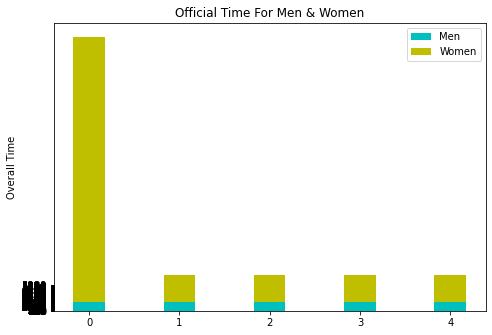

<Figure size 432x288 with 0 Axes>

In [43]:
#Display a bar graph that illustrates the str/list from above 

import matplotlib.pyplot as plt

N = 5

menMeans = (2075, 2075, 2008, 2008, 2008)
womenMeans = (61656, 6181, 6211, 6222, 6355 )
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='c')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='y')
ax.set_ylabel('Overall Time')
ax.set_title('Official Time For Men & Women')
ax.set_yticks(np.arange(0, 6000, 10))
ax.legend(labels=['Men', 'Women'])

plt.show()
plt.savefig('Official Top 5')